In [83]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

from numpy.linalg import det

from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error

from sklearn.decomposition import PCA

fN = '/Users/anaso/Documents/AA/AA-22-23/FichasCasa/Ficha3/MNISTsmall.p'


In [95]:
D = pickle.load(open(fN, 'rb'))

X = D['X']*1.
y = D['trueClass']

f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]


X_381_amostras = X2[:, y2==0][:, :381]
print(X_381_amostras.shape)



(784, 381)


#### Exercício 1. 
#### (a) - [1, 0, 0, 0]

In [100]:
Cx = np.cov(X_381_amostras)
u, V = la.eig(Cx)

u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

un = u/np.sum(u)
ucum = np.cumsum(un)

n_components = np.sum(ucum <= 0.75)

print("Número de componentes: ", n_components+1)

W = V[:, :n_components+1]

X_381_projetado = np.dot(W.T, X_381_amostras)
X_381_reconstruido = np.dot(W, X_381_projetado)

print("mean_absolute_error (Manual): ", np.round(mean_absolute_error(X_381_amostras[:, 172], X_381_reconstruido[:, 172])))


pca = PCA(n_components=0.75).fit(X_381_amostras.T)
print("Número de componentes: ", pca.components_.shape)
X_381_projetado = pca.transform(X_381_amostras.T)
X_381_reconstruido = pca.inverse_transform(X_381_projetado).T

print("mean_absolute_error (PCA): ", np.round(mean_absolute_error(X_381_amostras[:, 172], X_381_reconstruido[:, 172])))



Número de componentes:  18
mean_absolute_error (Manual):  14.0
Número de componentes:  (18, 784)
mean_absolute_error (PCA):  14.0


#### (b) - [0, 0, 0, 1]

In [102]:
X_381_amostras.shape
np.round(np.corrcoef(X_381_amostras[218], X_381_amostras[412]), 2)

array([[ 1. , -0.1],
       [-0.1,  1. ]])

#### (c) - [0, 0, 0, 1]

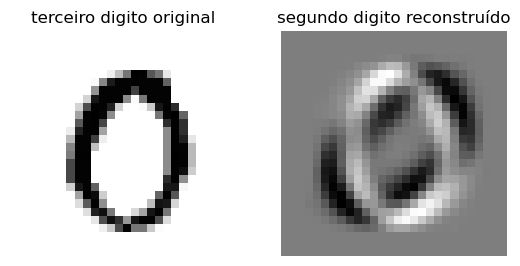

In [115]:
X_terceiro_digito = X_381_amostras[:, 2]
segundo_vetor_proprio = V[:, 1]

plt.figure()
plt.subplot(121)
plt.title('terceiro digito original')
plt.axis('off')
plt.imshow(255-X_terceiro_digito.reshape(28,28), cmap='gray', interpolation=None)

plt.subplot(122)
plt.title('segundo digito reconstruído')
plt.axis('off')
plt.imshow(segundo_vetor_proprio.reshape(28,28), cmap='gray', interpolation=None)

#### (d) - [0, 1, 0, 0]

In [117]:
X_178 = X_381_amostras[:, 178-1][:, np.newaxis]


W_13 = W[:, :13]
print(W_13.shape)

X_178_projetado = np.dot(W_13.T, X_178)
X_178_resconstruido = np.dot(W_13, X_178_projetado)

print(np.round(mean_squared_error(X_178, X_178_resconstruido), 0))

(784, 13)
1103.0


#### (e) - [1, 0, 0, 0]

In [89]:
cov = np.cov(X_381_amostras)

print(cov.shape)
print(det(cov))

(784, 784)
0.0


#### (f) - [0, 1, 0, 0]

In [99]:
pca = PCA(n_components=0.9).fit(X_381_amostras.T)

print(pca.components_.shape)


cov = np.cov(X_381_amostras)
u, V = la.eig(cov)
u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

un = u/np.sum(u)
ucum = np.cumsum(un)

print(np.sum(ucum<=0.9)+1)


(49, 784)
49


#### (g) - [0, 1, 0, 0]

310


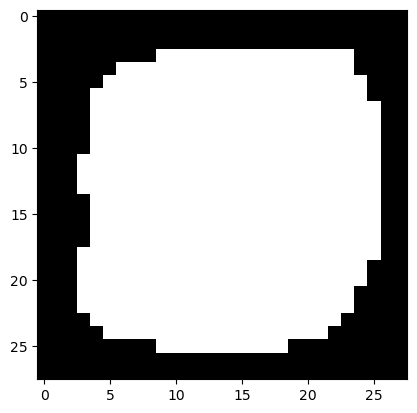

In [121]:
cov = np.cov(X_381_amostras)
idx = np.diag(cov) != 0


plt.figure()
plt.imshow(idx.reshape(28,28), cmap='gray', interpolation=None)

print(np.sum(idx == 0))


#### (h) - [1, 0, 0, 0]

In [92]:
mX = np.mean(X_381_amostras, axis=1)
print(np.round(la.norm(mX)))
print(np.round(np.std(X_381_amostras[158-1])))

1917.0
104.0


#### (i) - [0, 0, 0, 1]

In [122]:
cov = np.cov(X_381_amostras)

u, V = la.eig(cov)
u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

V = V[:, u>10e-10]

print(np.sum(u>10e-10))


380


#### (j) - [0, 1, 0, 0]

In [94]:
x1 = X_381_amostras[:, 225-1]
x2 = X_381_amostras[:, 226-1]
x3 = X_381_amostras[:, 274-1]
x4 = X_381_amostras[:, 292-1]


print(np.round(np.dot(x1, x2)))
print(np.round(np.dot(x3, x4)))


1333184.0
2975543.0
